# PPM (exp. 3)

In [1]:
from cmme.drex import DREXDistribution

#changed after 82
input_sequence = [2000, 1587, 315, 1414, 890, 397, 1781, 630, 222, 561, 1259, 280, 1122, 2000, 500, 315, 1414, 222, 630, 890, 280, 1000, 315, 561, 1000, 707, 250, 2000, 280, 445, 1259, 354, 250, 397, 315, 445, 1414, 707, 397, 1000, 280, 707, 1122, 2000, 1122, 630, 1587, 793, 500, 354, 890, 250, 890, 1122, 280, 315, 1781, 397, 1000, 500, 354, 890, 793, 222, 561, 1259, 1781, 1259, 1587, 222, 445, 793, 397, 630, 315, 1781, 354, 1000, 445, 561, 250, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259]
prior_input_sequence = [1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259]
prior_distribution = DREXDistribution.GAUSSIAN
prior_DOrMaxNComp = 5

alphabet_levels = sorted(set(input_sequence))

print("Input sequence:", input_sequence)
print("Length of input sequence:", len(input_sequence))
print()
print("DREX: Prior input sequence:", prior_input_sequence)
print("DREX: Length of prior input sequence:", len(prior_input_sequence))
print("DREX: Prior distribution:", prior_distribution)
print("DREX: Prior D or MaxNComp:", prior_DOrMaxNComp)
print()
print("PPM: Alphabet levels:", alphabet_levels)

/Users/alexander/opt/anaconda3/envs/cmme/lib/python3.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Input sequence: [2000, 1587, 315, 1414, 890, 397, 1781, 630, 222, 561, 1259, 280, 1122, 2000, 500, 315, 1414, 222, 630, 890, 280, 1000, 315, 561, 1000, 707, 250, 2000, 280, 445, 1259, 354, 250, 397, 315, 445, 1414, 707, 397, 1000, 280, 707, 1122, 2000, 1122, 630, 1587, 793, 500, 354, 890, 250, 890, 1122, 280, 315, 1781, 397, 1000, 500, 354, 890, 793, 222, 561, 1259, 1781, 1259, 1587, 222, 445, 793, 397, 630, 315, 1781, 354, 1000, 445, 561, 250, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259]
Length of input sequence: 130

DREX: Prior input sequence: [1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259]
DREX: Length of prior input sequence: 18
DREX: Prior distribution: DREXDistribution.GAUSSIAN
DREX: Prior D or MaxNComp: 5

PPM: Alphabe

In [2]:
from pathlib import Path
from cmme.config import Config

base_path = Path(Config().model_io_path())
print(base_path)

/Users/alexander/git/cmme-jupyter/io


In [3]:
ppm_model_input_file_path = base_path / "ppm_stimulus-ppm_model_input.csv"
ppm_model_output_file_path = base_path / "ppm_stimulus-ppm_model_output.csv"

print(ppm_model_input_file_path)
print(ppm_model_output_file_path)

/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-ppm_model_input.csv
/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-ppm_model_output.csv


In [4]:
drex_calculate_prior_input_file_path = base_path / "ppm_stimulus-drex_prior_input.mat"
drex_calculate_prior_output_file_path = base_path / "ppm_stimulus-drex_prior_output.mat"

drex_model_input_file_path = base_path / "ppm_stimulus-drex_model_input.mat"
drex_model_output_file_path = base_path / "ppm_stimulus-drex_model_output.mat"

print(drex_calculate_prior_input_file_path)
print(drex_calculate_prior_output_file_path)
print()
print(drex_model_input_file_path)
print(drex_model_output_file_path)

/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-drex_prior_input.mat
/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-drex_prior_output.mat

/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-drex_model_input.mat
/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-drex_model_output.mat


In [5]:
plot_output_base_path = base_path / "ppm_stimulus.xyz"
print(plot_output_base_path)

/Users/alexander/git/cmme-jupyter/io/ppm_stimulus.xyz


# PPM

In [6]:
from cmme.ppm import *

ppmib = PPMDecayInstanceBuilder()
ppmib.with_input_file_path(ppm_model_input_file_path).with_output_file_path(ppm_model_output_file_path)

ppm = ppmib.alphabet_levels(alphabet_levels).build()

result = ppm.observe(input_sequence, [])

ppm_output_file = result
print("PPM output file:", ppm_output_file)

[1] "/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-ppm_model_output.csv"

PPM output file: /Users/alexander/git/cmme-jupyter/io/ppm_stimulus-ppm_model_output.csv


# D-REX

In [7]:
from cmme.drex import *

drexpe = DREXPriorEstimator(drex_calculate_prior_input_file_path, drex_calculate_prior_output_file_path)
prior_estimator_result = drexpe.estimate(prior_distribution, prior_input_sequence, prior_DOrMaxNComp)

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-78633a0d-027a-4fb4-b9ae-e9969c22d45d
Send 'exit' command to kill the server
.....MATLAB started and connected!


In [8]:
prior_estimator_output_file = prior_estimator_result['result']['output_file_path']
prior = DREXPriorOutputParameters.from_mat(prior_estimator_output_file)

In [9]:
drexib = DREXInstanceBuilder(prior)
drexib.with_input_file_path(drex_model_input_file_path).with_output_file_path(drex_model_output_file_path)
drex = drexib.build()

In [10]:
result = drex.observe(input_sequence)
print(result)

MATLAB closed
Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-37cabbf4-d95c-4981-b2d3-e8aeecee3211
Send 'exit' command to kill the server
.....MATLAB started and connected!
{'result': {'output_file_path': '/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-drex_model_output.mat'}, 'success': True, 'content': {'stdout': '', 'figures': [], 'datadir': '/private/var/folders/k8/rwfqyjkn7tldqfjyyc_mp27c0000gn/T/MatlabData/'}}


In [11]:
drex_output_file = result['result']['output_file_path']

print("DREX output file:", drex_output_file)

DREX output file: /Users/alexander/git/cmme-jupyter/io/ppm_stimulus-drex_model_output.mat


# Plot

In [12]:
from cmme.model_output_plot import *

mop = ModelOutputPlot(ppm_output_file, drex_output_file, plot_output_base_path)
mop_figures = mop.plot()

mop_figures

2022-07-24 09:57:35.175 MATLAB[1053:3124078] CoreText note: Client requested name ".SFNS-Regular", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-07-24 09:57:35.175 MATLAB[1053:3124078] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2022-07-24 09:57:35.181 MATLAB[1053:3124078] CoreText note: Client requested name ".SFNS-Bold", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-07-24 09:57:35.190 MATLAB[1053:3124078] CoreText note: Client requested name ".SFNS-Regular", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-07-24 09:57:35.190 MATLAB[1053:

['/Users/alexander/git/cmme-jupyter/io/ppm_stimulus-MatlabFig001.png']

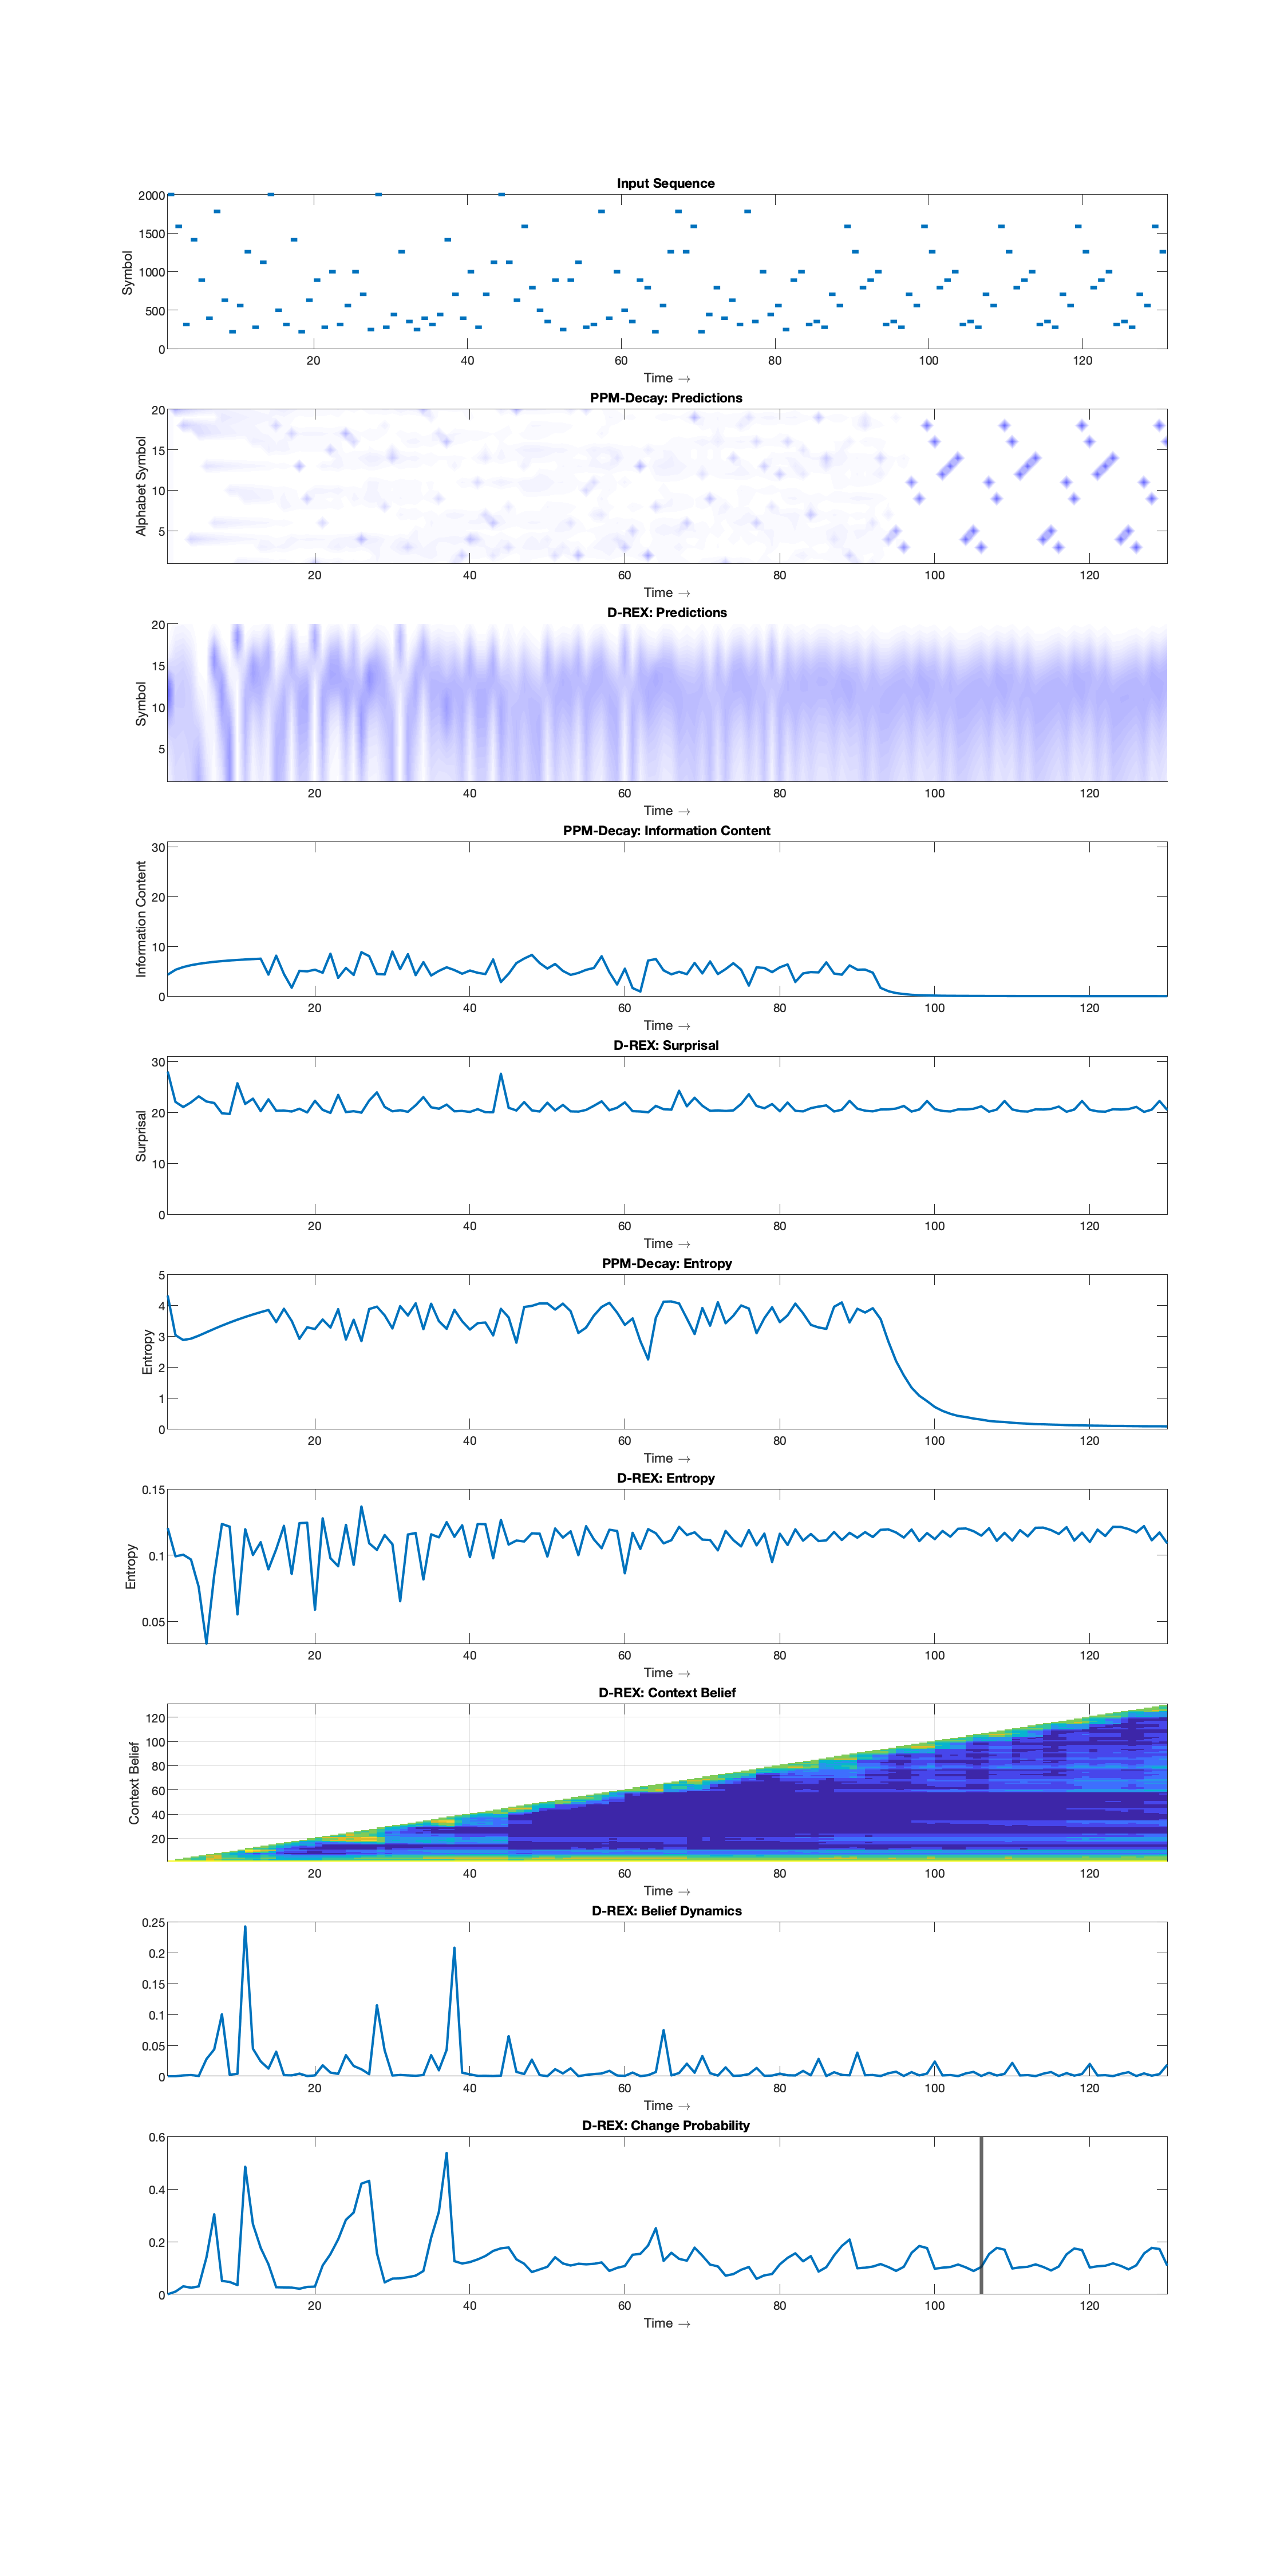

MATLAB closed


In [13]:
from IPython.display import Image
for f in mop_figures:
    display(Image(filename=f))